In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_log_error , r2_score

In [2]:
# Importing train and test datasets
df_train=pd.read_csv('train.csv',index_col='Id')
df_test=pd.read_csv('test.csv',index_col='Id')


In [3]:
df_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [4]:
df_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml


In [5]:
# subsetting SalePrice column from train dataset as Y (target) and dropping it from train dataset
Y = df_train.pop('SalePrice')

In [6]:
# Concatenating train and test data for processing
df = pd.concat([df_train,df_test],sort=False)

In [7]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml


In [8]:
# Missing data in df column wise
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
LotFrontage      486
GarageFinish     159
GarageQual       159
GarageCond       159
GarageYrBlt      159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
Utilities          2
GarageArea         1
GarageCars         1
Electrical         1
KitchenQual        1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
SaleType           1
dtype: int64

In [9]:
# We can see that column 'PoolQC' has maximum null values

As per data description of PoolQC,<br>
`PoolQC: Pool quality
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool`

_So missing values simply means their is no pool_

In [10]:
# Imputing these missing values with string 'NA'
df['PoolQC'].fillna('NA',inplace=True)

In [11]:
# similarly for 'MiscFeature' column

`MiscFeature: Miscellaneous feature not covered in other categories
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None`

In [12]:
df['MiscFeature'].fillna('NA',inplace=True)

In [13]:
# Categorical columns which have missing values
df.describe(include='object').T[df.describe(include='object').T['count']<df.shape[0]].sort_values(by=['count'])

,count,unique,top,freq
Alley,198,2,Grvl,120
Fence,571,4,MnPrv,329
FireplaceQu,1499,5,Gd,744
GarageCond,2760,5,TA,2654
GarageQual,2760,5,TA,2604
GarageFinish,2760,3,Unf,1230
GarageType,2762,6,Attchd,1723
BsmtCond,2837,4,TA,2606
BsmtExposure,2837,4,No,1904
BsmtQual,2838,4,TA,1283


In [14]:
# so, categorical column which contains NA as a feature and not as missing values are,
#    Alley, Fence, FireplaceQU, GarageCond, GarageQual, GarageFinish, GarageType, BsmtCond, BsmtExposure, BsmtQual, BsmtFinType2, BsmtFinType1 

In [15]:
# similarly, imputing NA  for categorical columns which includes NA as none

df['Alley'].fillna('NA',inplace=True)
df['Fence'].fillna('NA',inplace=True)
df['FireplaceQu'].fillna('NA',inplace=True)
df['GarageCond'].fillna('NA',inplace=True)
df['GarageQual'].fillna('NA',inplace=True)
df['GarageFinish'].fillna('NA',inplace=True)
df['GarageType'].fillna('NA',inplace=True)
df['BsmtCond'].fillna('NA',inplace=True)
df['BsmtExposure'].fillna('NA',inplace=True)
df['BsmtQual'].fillna('NA',inplace=True)
df['BsmtFinType2'].fillna('NA',inplace=True)
df['BsmtFinType1'].fillna('NA',inplace=True)



In [16]:
# categorical columns
df.describe(include='object').T[df.describe(include='object').T['count']<df.shape[0]].sort_values(by=['count'])

,count,unique,top,freq
MasVnrType,2895,4,None,1742
MSZoning,2915,5,RL,2265
Utilities,2917,2,AllPub,2916
Functional,2917,7,Typ,2717
Exterior1st,2918,15,VinylSd,1025
Exterior2nd,2918,16,VinylSd,1014
Electrical,2918,5,SBrkr,2671
KitchenQual,2918,4,TA,1492
SaleType,2918,9,WD,2525


In [17]:
# As seen above MasVnrType column has None as top frequency and data description gives,

`MasVnrType: Masonry veneer type
       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone`

In [18]:
# So missing values is equivalent to none, so imputing those with None
df['MasVnrType'].fillna('None',inplace=True)

In [19]:
# Filling rest of categorical columns with their respective top frequencies

df['MSZoning'].fillna('RL',inplace=True)
df['Utilities'].fillna('AllPub',inplace=True)
df['Functional'].fillna('Typ',inplace=True)
df['Exterior1st'].fillna('VinylSd',inplace=True)
df['Exterior2nd'].fillna('VinylSd',inplace=True)
df['Electrical'].fillna('SBrkr',inplace=True)
df['KitchenQual'].fillna('TA',inplace=True)
df['SaleType'].fillna('WD',inplace=True)

In [20]:
# Columns with missing values 
df.describe().T[df.isnull().sum() > 0].sort_values(by='count')


C:\Users\ukarj\AppData\Local\Temp/ipykernel_20984/973772382.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.describe().T[df.isnull().sum() > 0].sort_values(by='count')


,count,mean,std,min,25%,50%,75%,max
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
GarageYrBlt,2760.0,1978.113406,25.574285,1895.0,1960.0,1979.0,2002.0,2207.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
BsmtFullBath,2917.0,0.429894,0.524736,0.0,0.0,0.0,1.0,3.0
BsmtHalfBath,2917.0,0.061364,0.245687,0.0,0.0,0.0,0.0,2.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0
BsmtFinSF2,2918.0,49.582248,169.205611,0.0,0.0,0.0,0.0,1526.0
BsmtUnfSF,2918.0,560.772104,439.543659,0.0,220.0,467.0,805.5,2336.0
TotalBsmtSF,2918.0,1051.777587,440.766258,0.0,793.0,989.5,1302.0,6110.0
GarageCars,2918.0,1.766621,0.761624,0.0,1.0,2.0,2.0,5.0


In [21]:
# Some columns are missing due to their relational column for eg GarageYrBlt have missing values because their is no garage
# Imputing such columns with 0

df['GarageYrBlt'].fillna(0, inplace=True)
df['BsmtUnfSF'].fillna(0 , inplace=True)
df['GarageCars'].fillna(0, inplace=True)
df['GarageArea'].fillna(0, inplace=True)

In [22]:
# Imputing LotFrontage columns missing values with meas
df['LotFrontage'].fillna(df.BsmtHalfBath.mean(), inplace=True)

In [23]:
# Imputing rest of the columns with median values
df['MasVnrArea'].fillna(df.MasVnrArea.median(), inplace=True)
df['BsmtFullBath'].fillna(df.BsmtFullBath.median(), inplace=True)
df['BsmtHalfBath'].fillna(df.BsmtHalfBath.median(), inplace=True)
df['BsmtFinSF1'].fillna(df.BsmtFinSF1.median(), inplace=True)
df['BsmtFinSF2'].fillna(df.BsmtFinSF2.median(), inplace=True)
df['TotalBsmtSF'].fillna(df.TotalBsmtSF.median(), inplace=True)


In [24]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

Series([], dtype: int64)

In [25]:
# Now their are no null values left

In [26]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,0,NA,NA,NA,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,...,0,0,NA,NA,NA,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,0,NA,NA,NA,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,0,NA,NA,NA,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,...,0,0,NA,NA,NA,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,0,NA,NA,NA,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,0,NA,NA,NA,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,0,NA,NA,NA,0,9,2006,WD,Abnorml


In [27]:
# Creating a copy of  dataset
df_copy = df.copy()

#Converting objects data type to category data type
for key,value in df_copy.items():
    if pd.api.types.is_string_dtype(value):
        df_copy[key] = value.astype("category").cat.as_ordered()

In [28]:
#Replace categories with their code

for key,value in df_copy.items():
     if not pd.api.types.is_numeric_dtype(value):
        df_copy[key] = pd.Categorical(value).codes+1
        

In [29]:
df_copy

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,4,65.0,8450,2,2,4,4,1,5,...,0,0,4,5,2,0,2,2008,9,5
2,20,4,80.0,9600,2,2,4,4,1,3,...,0,0,4,5,2,0,5,2007,9,5
3,60,4,68.0,11250,2,2,1,4,1,5,...,0,0,4,5,2,0,9,2008,9,5
4,70,4,60.0,9550,2,2,1,4,1,1,...,0,0,4,5,2,0,2,2006,9,1
5,60,4,84.0,14260,2,2,1,4,1,3,...,0,0,4,5,2,0,12,2008,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,5,21.0,1936,2,2,4,4,1,5,...,0,0,4,5,2,0,6,2006,9,5
2916,160,5,21.0,1894,2,2,4,4,1,5,...,0,0,4,5,2,0,4,2006,9,1
2917,20,4,160.0,20000,2,2,4,4,1,5,...,0,0,4,5,2,0,9,2006,9,1


In [30]:
# Splitting training and testing data in same ratio as earlier

train = df_copy[:1460]
test = df_copy[1460:]

In [31]:
# adding target column(Y) to the train dataset

train['SalePrice']=Y

C:\Users\ukarj\AppData\Local\Temp/ipykernel_20984/2139492700.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['SalePrice']=Y


In [32]:
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,4,65.0,8450,2,2,4,4,1,5,...,0,4,5,2,0,2,2008,9,5,208500
2,20,4,80.0,9600,2,2,4,4,1,3,...,0,4,5,2,0,5,2007,9,5,181500
3,60,4,68.0,11250,2,2,1,4,1,5,...,0,4,5,2,0,9,2008,9,5,223500
4,70,4,60.0,9550,2,2,1,4,1,1,...,0,4,5,2,0,2,2006,9,1,140000
5,60,4,84.0,14260,2,2,1,4,1,3,...,0,4,5,2,0,12,2008,9,5,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,4,62.0,7917,2,2,4,4,1,5,...,0,4,5,2,0,8,2007,9,5,175000
1457,20,4,85.0,13175,2,2,4,4,1,5,...,0,4,3,2,0,2,2010,9,5,210000
1458,70,4,66.0,9042,2,2,4,4,1,5,...,0,4,1,4,2500,5,2010,9,5,266500


In [33]:
# Removing outliers with z-score
z=np.abs(stats.zscore(train))

In [34]:
z.describe().loc[['min','max']]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
min,0.073375,0.045532,0.010563,0.001320,0.064238,0.024699,0.040843,0.314667,0.026180,0.011823,...,0.068692,0.063305,0.457447,0.185975,0.021193,0.119110,0.138777,0.313867,0.208502,0.000992
max,3.147673,4.793863,7.373199,20.518273,15.567059,4.031411,1.378933,3.926074,38.196859,1.861302,...,18.306180,21.265532,3.237563,7.879092,31.165268,2.100892,1.645210,4.842206,3.426284,7.228819


In [35]:
# Keeping just the rows with maximum z-score of 8
train_z=train[(z<8).all(axis=1)]

In [36]:
train_z

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,4,65.0,8450,2,2,4,4,1,5,...,0,4,5,2,0,2,2008,9,5,208500
2,20,4,80.0,9600,2,2,4,4,1,3,...,0,4,5,2,0,5,2007,9,5,181500
3,60,4,68.0,11250,2,2,1,4,1,5,...,0,4,5,2,0,9,2008,9,5,223500
4,70,4,60.0,9550,2,2,1,4,1,1,...,0,4,5,2,0,2,2006,9,1,140000
5,60,4,84.0,14260,2,2,1,4,1,3,...,0,4,5,2,0,12,2008,9,5,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,4,62.0,7917,2,2,4,4,1,5,...,0,4,5,2,0,8,2007,9,5,175000
1457,20,4,85.0,13175,2,2,4,4,1,5,...,0,4,3,2,0,2,2010,9,5,210000
1458,70,4,66.0,9042,2,2,4,4,1,5,...,0,4,1,4,2500,5,2010,9,5,266500


## Feature selection

In [37]:
# Getting correlation of each features with salePrice column
corr=train_z.corrwith(train_z.SalePrice).sort_values(ascending=False)

In [38]:
# Selecting highly correlated features (>0.5 or <-0.5)
features=list(corr[(corr>0.5) | (corr<(-0.5))].index)

In [39]:
features

['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd',
 'KitchenQual',
 'BsmtQual',
 'ExterQual']

<AxesSubplot:>

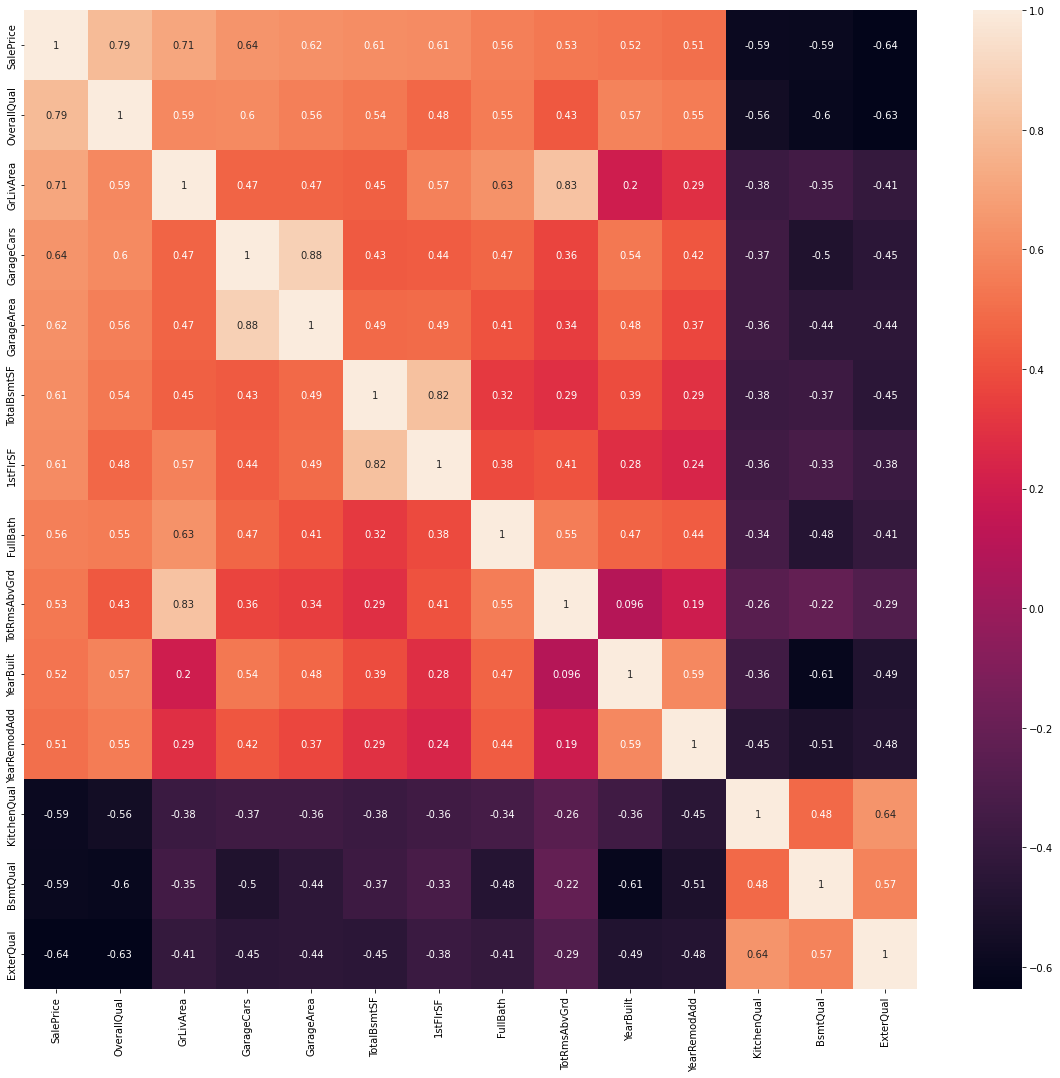

In [40]:
plt.figure(figsize=(20,18))
sns.heatmap(train[features].corr(), annot=True)

In [41]:
# Selecting final features from above

GarageArea and GarageCars have high correlaation among themselves, thus choosing one from them which high correlation with the target i,e. GarageCars

In [42]:
features.remove('GarageArea')

similarly TotalBsmtSF and 1stFlrSF have high correlation among themself, they also have similar correlation with the target, so choosing the one which has low correlation with other features i,e. 1stFlrSF

In [43]:
features.remove('TotalBsmtSF')

## Modelling

In [44]:
X=train_z[features].drop('SalePrice',axis=1)
y=train_z['SalePrice']

In [45]:
# Scaling the X dataset
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)


In [46]:
#spliting train dataset 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=100)

In [47]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [48]:
# Prediction
y_pred=model.predict(X_test)

# Scores
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
msle=mean_squared_log_error(y_test,y_pred)
r2 =r2_score(y_test,y_pred)


In [49]:
print(rmse,msle,r2,sep='\n')

33158.48831180189
0.023903148349856698
0.835579573729108


## Predicting on test Data

In [52]:
features.remove('SalePrice')

In [53]:
test[features]

,OverallQual,GrLivArea,GarageCars,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,KitchenQual,BsmtQual,ExterQual
Id,,,,,,,,,,,
1461,5,896,1.0,896,1,5,1961,1961,4,5,4
1462,6,1329,1.0,1329,1,6,1958,1958,3,5,4
1463,5,1629,2.0,928,2,6,1997,1998,4,3,4
1464,6,1604,2.0,926,2,7,1998,1998,3,5,4
1465,8,1280,2.0,1280,2,5,1992,1992,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...
2915,4,1092,0.0,546,1,5,1970,1970,4,5,4
2916,4,1092,1.0,546,1,6,1970,1970,4,5,4
2917,5,1224,2.0,1224,1,7,1960,1996,4,5,4


In [54]:
test_scaled=scaler.fit_transform(test[features])

In [55]:
test_pred=model.predict(test_scaled)

In [56]:
test_pred

array([102891.35460413, 159748.52404912, 163771.13152505, ...,
       143975.39296006, 119679.6128717 , 220591.363969  ])

In [57]:
test_preds=pd.DataFrame({'Id':range(1461,2920),'SalePrice':(test_pred)})
test_preds

,Id,SalePrice
0,1461,102891.354604
1,1462,159748.524049
2,1463,163771.131525
3,1464,176369.657827
4,1465,213793.235777
...,...,...
1454,2915,83675.020842
1455,2916,92868.591004
1456,2917,143975.392960
1457,2918,119679.612872


In [474]:
test_preds.to_csv('First_submission.csv', index=False)
